# OpenCV ML 

- Intro Machine Learning
- Intro OpenCV ML
- Intro SVM Algorithm
- SVM + LBPH For Facerecognition
- Compare with Scikit-Learn Implementation
- Hyperparameter tunning & search 
- Run Inference Model as MJPEG Stream


## Background

- OpenCV `cv2.face` implementing a facial recognition system using Eigenface, Fisherface and Local Binary Pattern Histogram (LBPH).
- Eigenface, Fisherface and LBPH used by `cv2.face` recognizer actualy just a **facial descriptior**.
- **Facial Descriptor** is a proses creating **vector data** (numerical value) from the original data (image).
- For example in LBPH the vector data is histogram value of LBP image. 
- Generally this stage is called **Feature Extraction**. 
> *if Eigenface, Fisherface and LBPH is only about createing a vector data, how the cv2.face recognize the face (classification)?*
- LBPH in OpenCV is performed using a **nearest neighbour** classi-ﬁer in the computed feature space with metric **Chi square** as a dissimilarity mea-sure. *[-Face Recognition with Local Binary Patterns-](https://www.researchgate.net/publication/221304831_Face_Recognition_with_Local_Binary_Patterns)*<br>
<img src="resource/Face-recognizers.png" dtyle="width:400px"></img>
> *Is possible to use onother classifier for  facial decriptor like LPBH?*

##  Intro Machine Learning
- The study of computer algorithms that improve automatically through experience.[1][2]
- It is seen as a subset of **artificial intelligence**. 
- Machine learning algorithms build a **mathematical model** based on **sample data**, known as "training data".
- Machine learning is closely related to **computational statistics**, which focuses on making predictions using computers. 

> *Machine learning provides systems the ability to **automatically learn** and **improve from experience** without being **explicitly programmed**.*

![](resource/machine_learning.png)

### Dataset
- In the case of tabular data, a data set corresponds to one or more database **tables**, where every **column** of a table represents a particular **variable/fature**, and each row corresponds to a **instance** data. <br>
- Tabular dataset : <br>
<img src="resource/text_dataset.png" style="width:400px"></img><br>
- Image Dataset :<br>
<img src="resource/image_dataset.png" style="width:500px"></img><br><br><br>
- Dataset Proportion :<br>
<img src="resource/dataset_proportion.jpeg" style="width:500px"></img>
    - **Training set** : is used in training phase,
    - **Validation set** : is used for validationg model during training, for example Cross Validation.
    - **Test set** : is used in testing phase (after training model finish).
- Common portion :
    - Trainig set : 50%
    - Validation set : 25%
    - Test set : 25%


### Machine Learning Algorithm
<img src="resource/ml_algorithm.png" style="width:500px"></img>

### Supervised Machine Learning
- **Classification**: Relates to **categorical data output**, such as whether it is red or not, whether the weather is sunny or cloudy, healthy or sick.
- **Regression**: Relates to **continuous data output**, such as length, weight, velocity
<img src="resource/supervised_learning.png" style="width:500px"></img>
- Algorithm :
    - Support Vector Machine (SVM)
    - Linear Regression
    - Logistic Regression
    - Naive Bayes
    - Linear Discriminant Analysis (LDA)
    - Decision Tree
    - K-nearest Neighbor
    - Neural Network (Multilayer Perceptron)
    - Similarity Learning
    - Etc.


___
## Intro OpenCV ML 
- Main Doc : https://docs.opencv.org/master/dc/dd6/ml_intro.html
- List of Machine Learning Algorithm on OpenCV ML :
    - Normal Bayes Classifier
    - K-Nearest Neighbors (KNN)
    - Support Vector Machines (SVM)
    - Decision Trees
    - Variable Importance
    - Boosting
    - Random Trees
    - Expectation Maximization
    - Neural Networks
    - Logistic Regression

### Support Vector Machines
- Are supervised learning models with associated learning algorithms that analyze data used for **classification** and **regression analysis**.
- Support Vector Machines is a **discriminative classifier** formally defined by a **separating hyperplane**. In other words, given labeled training data (supervised learning), the algorithm outputs an **optimal hyperplane** which categorizes new examples.
- Developed at AT&T Bell Laboratories by Vapnik with colleagues (Boser et al., 1992, Guyon et al., 1993, Vapnik et al., 1997).
- One of the most robust prediction methods, based on the statistical learning framework or VC theory proposed by Vapnik and Chervonenkis (1974) and Vapnik (1982, 1995).

#### Linearly Separable Data
- H1 does not separate the classes. 
- H2 does, but only with a small margin. 
- H3 separates them with the **maximal margin**.<br>

<img src="resource/lineary_sparable.png" style="width:250px"></img>

- **Maximum-margin hyperplane** and **margins** for an SVM trained with samples from two classes. 
- Samples on the margin are called the **support vectors**. <br>
<img src="resource/SVM_margin.png" style="width:250px"></img>
- Multiclass Dataset :<br>
<img src="resource/multicalss_svm.png" style="width:500px"></img>


## SVM using OpenCV ML

In [1]:
import cv2 
import numpy as np
import matplotlib.pyplot as plt
import os

- setup dataset
    - x_train : input data (4 samples , 2 feature data )
    - y_train : output data

In [2]:
x_train = np.array([[10, 10], 
                    [0, 10], 
                    [10, 0], 
                    [0, 0]], dtype=np.float32)

y_train = np.array([ 10, 
                     10, 
                     0, 
                     0])

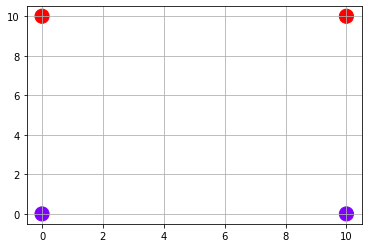

In [3]:
plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train, s=200, cmap='rainbow')
plt.grid()
plt.show()

#### Documentation of SVM Model - OpenCV ML

- `cv.ml.SVM_create()` : create empty model SVM
- method `.setType(svm_type)` :
    - where `svm_type` :
        - `cv2.ml.SVM_C_SVC` : $C$-Support Vector Classification. n-class classification (n ≥ 2), allows imperfect separation of classes.
        - `cv2.ml.SVM_NU_SVC` : $ν$-Support Vector Classification. n-class classification with imperfect separation. Parameter $ν$ (0..1).
        - `cv2.ml.SVM_ONE_CLASS` : Distribution Estimation (One-class SVM). 
        - `cv2.ml.SVM_EPS_SVR` : $ϵ$-Support Vector Regression. 
        - `cv2.ml.SVM_NU_SVR` : $ν$-Support Vector Regression. 
    - `svm_type` parameter :
        - set $C$ (regularization parameter) if using C-SVC/NU-SVR/EPS-SVR : `.setC()`
        - set $ϵ$ (epsilon) if using EPS-SVR : `.setP()`
        - set $ν$ (nu) if using NU-SVC/NU-SVR/SVM-ONE_CLASS : `.setNU()`
- method `.setKernel(kernel_type)` :
    - where `kernel_type` :
        - `cv2.ml.SVM_LINEAR` : Linear kernel, It is the fastest option
        - `cv2.ml.SVM_POLY` : Polynomial kernel
        - `cv2.ml.SVM_RBF` : Radial basis function (RBF), a good choice in most cases
        - `cv2.ml.SVM_SIGMOID` : Sigmoid kernel
    - Kernel Parameter :
        - **linear** &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;: $\langle x, x'\rangle$
        - **polynomial** &nbsp;&nbsp;&nbsp;&nbsp;: $(\gamma \langle x, x'\rangle + r)^d$ , where $d$ is specified by parameter `degree`, $r$ by `coef0`.
        - **rbf**&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;: $\exp(-\gamma \|x-x'\|^2)$, where $\gamma$ is specified by parameter `gamma`, must be greater than `0`.
        - **sigmoid**&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;: $\tanh(\gamma \langle x,x'\rangle + r)$, where $r$ is specified by `coef0`.
    - Set kernel parameter :
        - set `degree` :  use method `.setDegree()`
        - set `gamma` : use method `.setGamma()`
        - set `coef0` : use method `.setCoef0()`
- method `.setTermCriteria(criteria_type, maxCount, epsilon)`:
    - where `criteria_type` :
        - `cv2.TERM_CRITERIA_MAX_ITER` : the maximum number of iterations or elements to compute
        - `cv2.TERM_CRITERIA_EPS` : the desired accuracy or change in parameters at which the iterative algorithm stops
        - `cv2.TERM_CRITERIA_MAX_ITER` + `cv2.TERM_CRITERIA_EPS`
        - `maxCount` and `epsilon` is termination value for each selected createria by `criteria_type` 

- **SVR (Support Vector Regression)** 
    - The value of $ϵ$ **epsilon** defines a **margin** of tolerance where no penalty is given to errors
    - The larger **epsilon** is the larger errors 

![](resource/epsilon_svmjpg.jpg)

- **SVC (Support Vector Classification)** 
    - The value of $C$ define **regularization parameter**. The strength of the regularization is **inversely** proportional to $C$. Must be strictly positive. <br>
<img src="resource/SVM-C.gif" style="width:300px"></img>

- create SVM model

In [4]:
svm = cv2.ml.SVM_create()
svm.setType(cv2.ml.SVM_C_SVC)
svm.setKernel(cv2.ml.SVM_LINEAR)
svm.setTermCriteria((cv2.TERM_CRITERIA_MAX_ITER, 100, 0.001))

- Train SVM

In [5]:
svm.train(x_train, cv2.ml.ROW_SAMPLE, y_train)

True

- predict result

In [ ]:
width = 10
height = 10

plot_x = []
plot_y = []
for i in range(width):
    for j in range(height):
        y = svm.predict(np.array([[i,j]], dtype=np.float32))[1]
        plot_y.append(y)
        plot_x.append([i,j])

In [ ]:
plot_x = np.array(plot_x)
plot_y = np.array(plot_y, dtype=np.float32)

In [ ]:
plt.scatter(plot_x[:, 0], plot_x[:, 1], c=plot_y, s=200, cmap='rainbow')
plt.grid()
plt.show()

___

# SVM with LBPH for Facerecognitiong (OpenCV ML)

- Install library **Scikit-Learn** & **Scikit-Image**: <br>
`pip install scikit-learn` <br>
`pip install scikit-image`

In [ ]:
! pip install scikit-learn

In [10]:
! pip install scikit-image

# 1. Load Dataset

In [ ]:
def show_dataset(images_class, label):
    # show data for 1 class
    plt.figure(figsize=(14,5))
    k = 0
    for i in range(1,6):
        plt.subplot(1,5,i)
        try :
            plt.imshow(images_class[k][:,:,::-1])
        except :
            plt.imshow(images_class[k], cmap='gray')
        plt.title(label)
        plt.axis('off')
        plt.tight_layout()
        k += 1
    plt.show()

In [12]:
dataset_folder = "dataset/"

names = []
images = []
for folder in os.listdir(dataset_folder):
    for name in os.listdir(os.path.join(dataset_folder, folder))[:70]: # limit only 70 face per class
        if name.find(".jpg") > -1 :
            img = cv2.imread(os.path.join(dataset_folder + folder, name))
            images.append(img)
            names.append(folder)

In [13]:
labels = np.unique(names)

labels

array(['Colin_Powell', 'Donald_Rumsfeld', 'George_W_Bush',
       'Gerhard_Schroeder', 'Tony_Blair'], dtype='<U17')

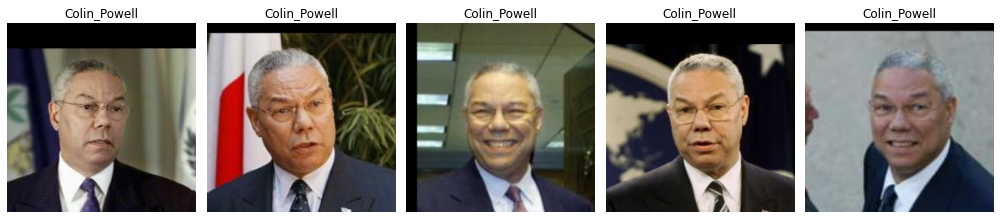

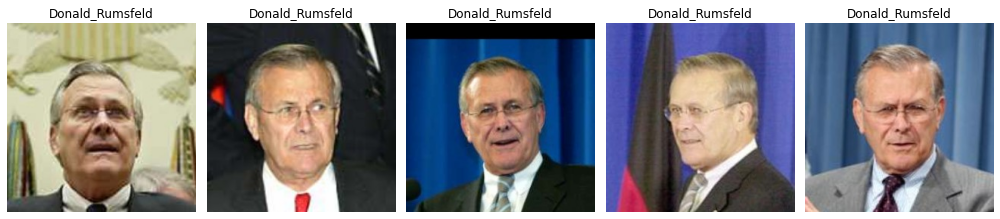

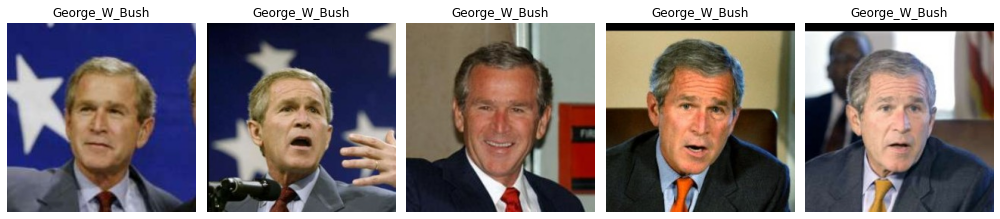

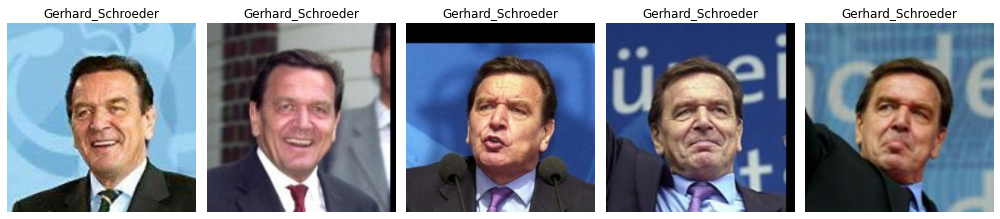

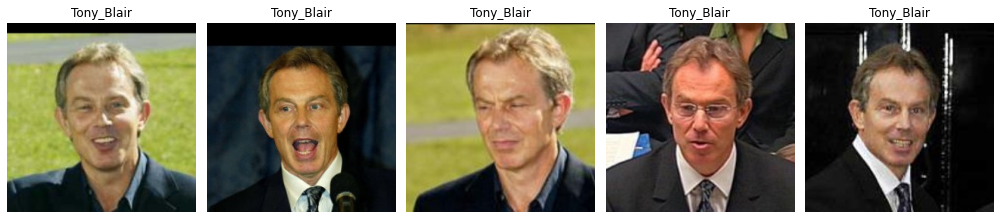

In [14]:
for label in labels:
    
    ids = np.where(label== np.array(names))[0]
    images_class = images[ids[0] : ids[-1] + 1]
    show_dataset(images_class, label)

- crop, resize & convert to grayscale for detected face area using **cascade classifier**

In [15]:
face_cascade = cv2.CascadeClassifier('haarcascades/haarcascade_frontalface_default.xml')

In [16]:
def detect_face(img, idx):
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(img, 1.3, 5)
    try :
        x, y, w, h = faces[0]

        img = img[y:y+h, x:x+w]
        img = cv2.resize(img, (100, 100))
    except :
        print("Face not found in image index", i)
        img = None
    return img

In [17]:
croped_images = []
for i, img in enumerate(images) :
    img = detect_face(img, i)
    if img is not None :
        croped_images.append(img)
    else :
        del names[i]


Face not found in image index 68
Face not found in image index 170


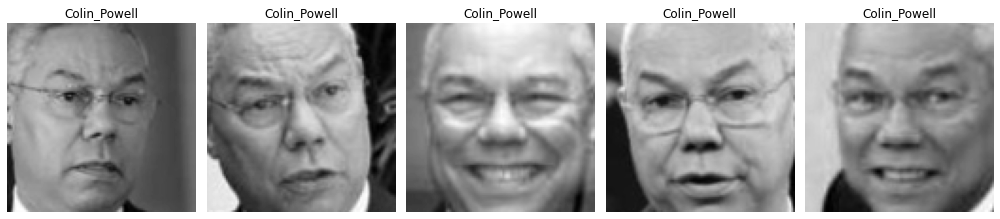

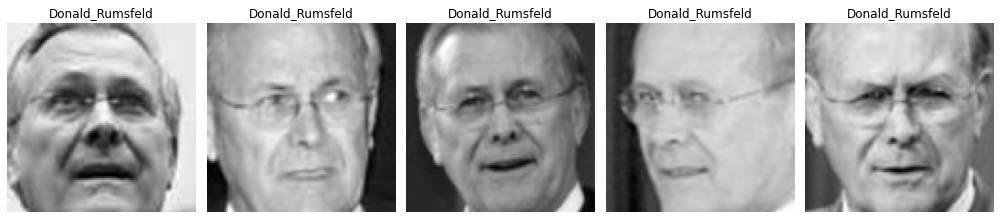

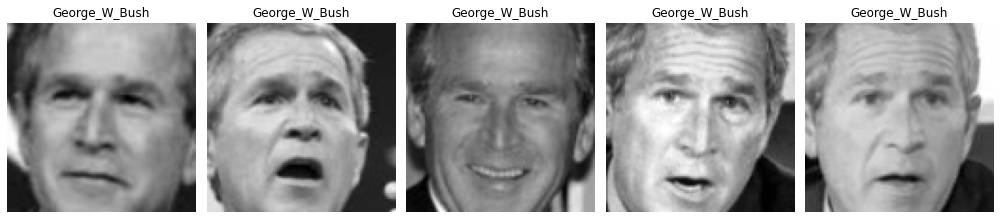

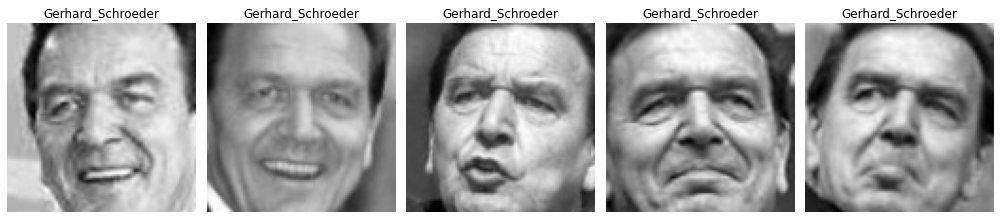

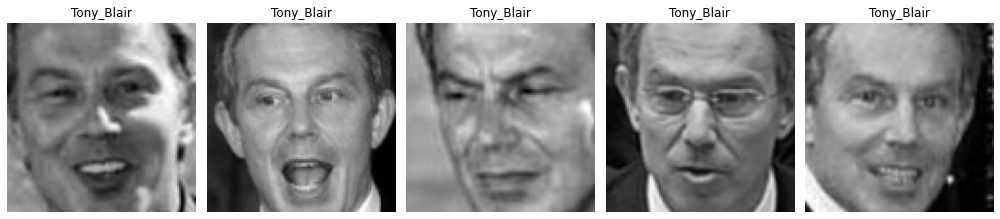

In [18]:
for label in labels:
    
    ids = np.where(label== np.array(names))[0]
    images_class = croped_images[ids[0] : ids[-1] + 1] # select croped images for each class
    show_dataset(images_class, label)

# 2. Label Encoding (Scikit-Learn)

In [19]:
from sklearn.preprocessing import LabelEncoder

In [20]:
le = LabelEncoder()

le.fit(names)

print(le.classes_)

['Colin_Powell' 'Donald_Rumsfeld' 'George_W_Bush' 'Gerhard_Schroeder'
 'Tony_Blair']


In [21]:
name_vec = le.transform(names)

In [22]:
print(name_vec)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4]


# 3. Split dataset (75% train, 25% test)

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
x_train, x_test, y_train, y_test = train_test_split(np.array(croped_images, dtype=np.float32),   # input data
                                                    np.array(name_vec),                            # target/output data 
                                                    test_size=0.25, 
                                                    random_state=42)

In [25]:
print(x_train.shape, y_train.shape, x_test.shape,  y_test.shape)

(257, 100, 100) (257,) (86, 100, 100) (86,)


# 4. LBPH without `cv2.face.LBPHFaceRecognizer_create()`

## 4.1 Find LBP Histograms for each image data using Scikit-Image

In [26]:
from skimage.feature import local_binary_pattern

- function `local_binary_pattern(img, P, R)`
- parameter :
    - `P` : `int`, Number of circularly symmetric neighbour set points (number of sample point).
    - `R` : `float`, Radius of circle.<br>
    
<img src="resource/lbp-param.jpg" style="width:300px"></img>
- default on OpenCV LPBH Recognizer :
    - `P` : 8
    - `R` : 1
- each value in LBP image is range from `[0, numPoints + 2]`

In [27]:
P = 8
R = 1
img = x_train[0]
lbp_img = local_binary_pattern(img, P=P, R=R, method="default")

In [28]:
H = np.histogram(lbp_img.ravel(),                          
                 bins=2**P,                          
                 range=(0, 2**P),
                 density=True)[0] 

In [29]:
print(H)

[0.013  0.0085 0.0001 0.0049 0.0097 0.0013 0.0056 0.0254 0.0002 0.0003
 0.     0.0001 0.0036 0.0003 0.0093 0.0344 0.0062 0.0037 0.     0.0004
 0.0009 0.0001 0.0001 0.001  0.004  0.0002 0.     0.0001 0.0271 0.0009
 0.0486 0.0364 0.0005 0.     0.     0.     0.0001 0.     0.     0.0001
 0.0001 0.     0.     0.     0.0001 0.     0.     0.0002 0.0041 0.0006
 0.     0.0004 0.0008 0.     0.0003 0.0005 0.0134 0.0002 0.     0.0002
 0.0578 0.0005 0.0189 0.0079 0.0098 0.0012 0.0001 0.0006 0.0032 0.
 0.0011 0.0014 0.0002 0.     0.     0.     0.0005 0.     0.0006 0.0003
 0.0011 0.0001 0.     0.     0.     0.     0.     0.     0.     0.
 0.     0.0001 0.001  0.0001 0.0004 0.0003 0.0051 0.0005 0.     0.0001
 0.0006 0.     0.     0.0006 0.     0.     0.     0.     0.0003 0.
 0.     0.0002 0.0241 0.0008 0.0001 0.0001 0.0008 0.     0.0003 0.0005
 0.0462 0.0001 0.     0.0001 0.0391 0.0002 0.0093 0.0039 0.0003 0.0039
 0.     0.0092 0.     0.0004 0.     0.057  0.     0.0002 0.     0.
 0.     0.0002 0.     

<function matplotlib.pyplot.show(close=None, block=None)>

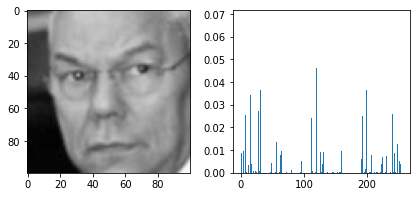

In [30]:
plt.figure(figsize=(7,3))
plt.subplot(1,2,1)
plt.imshow(img, cmap="gray")

plt.subplot(1,2,2)
axis = np.arange(len(H))
plt.bar(axis, H)

plt.show

## 4.2 Implement LBPH Face Recognition without OpenCV
- Feature : LBP (Scikit-Learn)
- Classifier : Nearest Neighbours (Scikit-Image)
- Metric : Chi 2 (*user defined function*)

In [31]:
from sklearn.neighbors import NearestNeighbors

In [32]:
class LBPHFaceRecognizer_custom():
    #
    # ----- class for LBPH + Nearest Neighbours (chi 2) ------
    #
    def __init__(self):
        self.neigh = NearestNeighbors(n_neighbors=1, radius=0.4, metric=self.chi2_distance)
        self.face_histograms = []
        self.y = []
    
    def chi2_distance(self, hist1, hist2, gamma=0.5): 
        chi = gamma * np.sum(((hist1 - hist2) ** 2) / (hist1 + hist2 + 1e-7))
        return chi
    
    def find_lbp_histogram(self, image, P=8, R=1, eps=1e-7, n_window=(8,8)):
        E = []
        h, w = image.shape
        h_sz = int(np.floor(h/n_window[0]))
        w_sz = int(np.floor(w/n_window[1]))
        lbp_img = local_binary_pattern(image, P=P, R=R, method="default")
        for (x, y, C) in self.sliding_window(lbp_img, stride=(h_sz, w_sz), window=(h_sz, w_sz)):
            if C.shape[0] != h_sz or C.shape[1] != w_sz:
                continue
            H = np.histogram(C,                          
                             bins=2**P, 
                             range=(0, 2**P),
                             density=True)[0] 
            
            H = H.astype("float")
            H /= (H.sum() + eps)
            E.extend(H)
        return E
    
    def sliding_window(self, image, stride, window):
        for y in range(0, image.shape[0], stride[0]):
            for x in range(0, image.shape[1], stride[1]):
                yield (x, y, image[y:y + window[1], x:x + window[0]])
                   
    def train(self, x, y):
        self.y = y
        self.face_histograms = [self.find_lbp_histogram(img) for img in x]
        self.neigh.fit(self.face_histograms)
    
    def predict(self, x):
        hists = [self.find_lbp_histogram(img) for img in x]
        dist, idx = self.neigh.kneighbors(hists)
        pred_id = np.array([self.y[i[0]] for i in idx])
        return pred_id, dist[0]

In [33]:
model_lbph_custom = LBPHFaceRecognizer_custom()

In [34]:
model_lbph_custom.train(x_train, y_train)

- predict to all test dataset

In [35]:
y_predict = model_lbph_custom.predict(x_test)[0]

- report summary

In [36]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [37]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.figure(figsize=(6, 6))
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

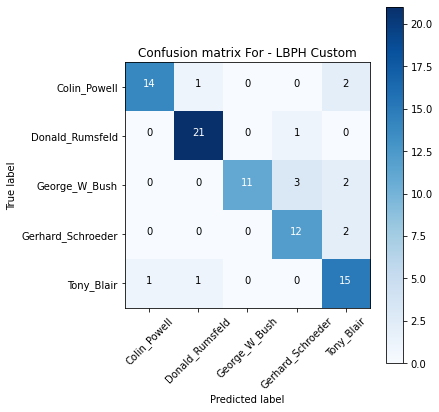

In [38]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_predict)
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plot_confusion_matrix(cnf_matrix, classes=labels,normalize=False,
                      title='Confusion matrix For - LBPH Custom')

In [39]:
print("== Classification Report for - LBPH Custom ==\n")
print(classification_report(y_test, 
                            y_predict, 
                            target_names=labels))

== Classification Report for - LBPH Custom ==

                   precision    recall  f1-score   support

     Colin_Powell       0.93      0.82      0.87        17
  Donald_Rumsfeld       0.91      0.95      0.93        22
    George_W_Bush       1.00      0.69      0.81        16
Gerhard_Schroeder       0.75      0.86      0.80        14
       Tony_Blair       0.71      0.88      0.79        17

         accuracy                           0.85        86
        macro avg       0.86      0.84      0.84        86
     weighted avg       0.87      0.85      0.85        86



## 4.3 Compare with LBPHFaceRecognizer_create() in OpenCV 

In [40]:
lbph = cv2.face.LBPHFaceRecognizer_create()
lbph.train(x_train, y_train)

AttributeError: module 'cv2' has no attribute 'face'

- predict to all test dataset

In [ ]:
y_predict = [lbph.predict(x)[0] for x in x_test]

- result summary

In [ ]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_predict)
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plot_confusion_matrix(cnf_matrix, classes=labels,normalize=False,
                      title='Confusion matrix - LBPH OpenCV')

In [ ]:
print("== Classification Report - LBPH OpenCV ==\n")
print(classification_report(y_test, 
                            y_predict, 
                            target_names=labels))

# 5. SVM and LBPH for Facrecognition 

## 5.1 SVM OpenCV + LBPH Scikit 

In [ ]:
class LBPH_SVM_Recognizer_V1():
    #
    # ----- class for LBPH Scikit + SVM OpenCV------
    #
    def __init__(self, max_iter=100, epsilon=0.001, C=100, Gamma=0.001):
        self.svm = cv2.ml.SVM_create()
        self.svm.setKernel(cv2.ml.SVM_CHI2)
        self.svm.setType(cv2.ml.SVM_C_SVC)
        self.svm.setTermCriteria((cv2.TERM_CRITERIA_MAX_ITER, max_iter, epsilon))
        self.svm.setC(C)           
        self.svm.setGamma(Gamma) 
        
        self.face_histograms = []
        self.y = []
    
    def find_lbp_histogram(self, image, P=8, R=1, eps=1e-7, n_window=(8,8)):
        E = []
        h, w = image.shape
        h_sz = int(np.floor(h/n_window[0]))
        w_sz = int(np.floor(w/n_window[1]))
        lbp_img = local_binary_pattern(image, P=P, R=R, method="default")
        for (x, y, C) in self.sliding_window(lbp_img, stride=(h_sz, w_sz), window=(h_sz, w_sz)):
            if C.shape[0] != h_sz or C.shape[1] != w_sz:
                continue
            H = np.histogram(C,                          
                             bins=2**P, 
                             range=(0, 2**P),
                             density=True)[0] 
            E.extend(H)
        return E
    
    def sliding_window(self, image, stride, window):
        for y in range(0, image.shape[0], stride[0]):
            for x in range(0, image.shape[1], stride[1]):
                yield (x, y, image[y:y + window[1], x:x + window[0]])
                   
    def train(self, x, y):
        self.y = y
        self.face_histograms = [self.find_lbp_histogram(img) for img in x]
        hist_mat = np.array(self.face_histograms, dtype=np.float32)
        self.svm.train(hist_mat, cv2.ml.ROW_SAMPLE, y)
    
    def predict(self, x):
        hists = [self.find_lbp_histogram(img) for img in x]
        hist_mat = np.array(hists, dtype=np.float32)
        ret, idx = self.svm.predict(hist_mat, True)
        confidence = 1.0 / (1.0 + np.exp(-ret)) # convert retVal to confidence level (0-1) sigmoid
        return idx, confidence

In [ ]:
lbph_svm_model_v1 = LBPH_SVM_Recognizer_V1()

In [ ]:
lbph_svm_model_v1.train(x_train, y_train)

- save & load model

In [ ]:
lbph_svm_model_v1.svm.save("lbph_svm_model_v1.yml")

In [ ]:
lbph_svm_model_v1.svm.load("lbph_svm_model_v1.yml")

- predict to all data test

In [ ]:
y_predict = lbph_svm_model_v1.predict(x_test)[0]

- result summary

In [ ]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_predict)
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plot_confusion_matrix(cnf_matrix, classes=labels,normalize=False,
                      title='Confusion matrix - SVM OpenCV + LBPH Scikit ')

In [ ]:
print("== Classification Report - SVM OpenCV + LBPH Scikit ==\n")
print(classification_report(y_test, 
                            y_predict, 
                            target_names=labels))

___

## 5.2 SVM Scikit + LBPH Scikit

In [ ]:
from sklearn.neighbors import DistanceMetric
from sklearn.svm import SVC

In [ ]:
class LBPH_SVM_Recognizer_V2():
    #
    # ----- class for LBPH Scikit + SVM Scikit------
    #
    def __init__(self, C=100, Gamma=0.001):
        self.svm = SVC(kernel='precomputed', C=C, gamma=Gamma)
        self.chi2 = DistanceMetric.get_metric('pyfunc', func=self.chi2_distance)
        self.face_histograms = []
        self.hist_mat = []
        
    def chi2_distance(self, hist1, hist2, gamma=0.5): 
        chi = - gamma * np.sum(((hist1 - hist2) ** 2) / (hist1 + hist2 + 1e-7)) 
        return chi

    def find_lbp_histogram(self, image, P=8, R=1, eps=1e-7, n_window=(8,8)):
        E = []
        h, w = image.shape
        h_sz = int(np.floor(h/n_window[0]))
        w_sz = int(np.floor(w/n_window[1]))
        lbp_img = local_binary_pattern(image, P=P, R=R, method="default")
        for (x, y, C) in self.sliding_window(lbp_img, stride=(h_sz, w_sz), window=(h_sz, w_sz)):
            if C.shape[0] != h_sz or C.shape[1] != w_sz:
                continue
            H = np.histogram(C,                          
                             bins=2**P, 
                             range=(0, 2**P),
                             density=True)[0] 
            
            H = H.astype("float")
            H /= (H.sum() + eps)
            E.extend(H)
        return E
    
    def sliding_window(self, image, stride, window):
        for y in range(0, image.shape[0], stride[0]):
            for x in range(0, image.shape[1], stride[1]):
                yield (x, y, image[y:y + window[1], x:x + window[0]])
                   
    def train(self, x, y):
        self.face_histograms = [self.find_lbp_histogram(img) for img in x]
        self.hist_mat = np.array(self.face_histograms, dtype=np.float32)
        K = self.chi2.pairwise(self.hist_mat,self.hist_mat)
        self.svm.fit(K, y)
    
    def predict(self, x):
        hists = [self.find_lbp_histogram(img) for img in x]
        hist_mat = np.array(hists, dtype=np.float32)
        K = self.chi2.pairwise(hist_mat, self.hist_mat)
        idx = self.svm.predict(K)

        return idx, None

In [ ]:
lbph_svm_model_v2 = LBPH_SVM_Recognizer_V2()

In [ ]:
lbph_svm_model_v2.train(x_train, y_train)

- Save & load Model

In [ ]:
! pip install pickle-mixin

In [ ]:
import pickle

def save_model(model, filename, path=""): 
    with open(os.path.join(path, filename), 'wb') as out_name:
        pickle.dump(model, out_name, pickle.HIGHEST_PROTOCOL)

def read_model(filename, path=""):
    with open(os.path.join(path, filename), 'rb') as in_name:
        model = pickle.load(in_name)
        return model

In [ ]:
save_model(lbph_svm_model_v2, "lbph_svm_model_v2.pkl", path="")

In [ ]:
lbph_svm_model_v2 = read_model("lbph_svm_model_v2.pkl", path="")

- predict to all test data

In [ ]:
y_predict = lbph_svm_model_v2.predict(x_test)[0]

- result summary

In [ ]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_predict)
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plot_confusion_matrix(cnf_matrix, classes=labels, normalize=False,
                      title='Confusion matrix - SVM + LBPH Scikit')

In [ ]:
print("== Classification Report - SVM + LBPH Scikit ==\n")
print(classification_report(y_test, y_predict, target_names=labels))

___

# 6. Apply our face dataset

- colect data

In [ ]:
cap = cv2.VideoCapture(0)

my_name = "Yunus"
i = 0
while cap.isOpened():
    ret, frame = cap.read()
    
    if ret :
        cv2.imshow("Capture Photo", frame)
        cv2.imwrite("my_face/%s_%04d.jpg" %  (my_name, i), frame)
        
        if cv2.waitKey(100) == ord('q') or i == 71:
            break
        i += 1    
cap.release()
cv2.destroyAllWindows()

- move our face to dataset directory

In [ ]:
! Dir dataset\

In [ ]:
! mkdir dataset\Yunus

In [ ]:
! move my_face\* dataset\Yunus

- Rerun Load dataset, Traing & Test Model

## 6.2 Test Realtime Video

In [ ]:
def draw_ped(img, label, x0, y0, xt, yt, color=(255,127,0), text_color=(255,255,255)):

    (w, h), baseline = cv2.getTextSize(label, cv2.FONT_HERSHEY_SIMPLEX, 0.5, 1)
    cv2.rectangle(img,
                  (x0, y0 + baseline),  
                  (max(xt, x0 + w), yt), 
                  color, 
                  2)
    cv2.rectangle(img,
                  (x0, y0 - h),  
                  (x0 + w, y0 + baseline), 
                  color, 
                  -1)  
    cv2.putText(img, 
                label, 
                (x0, y0),                   
                cv2.FONT_HERSHEY_SIMPLEX,     
                0.5,                          
                text_color,                
                1,
                cv2.LINE_AA) 
    return img

In [ ]:
face_cascade = cv2.CascadeClassifier('haarcascades/haarcascade_frontalface_default.xml')

# --------- using SVM scikit + LBPH Scikit -------------
model = read_model("lbph_svm_model_v2.pkl", path="")

# --------- using SVM OpenCV + LBPH Scikit -------------
#model = LBPH_SVM_Recognizer_V2()
#model = model.svm.load("lbph_svm_model_v1.yml")

cap = cv2.VideoCapture(0)
while cap.isOpened() :
    ret, frame = cap.read()
    if ret:
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        faces = face_cascade.detectMultiScale(gray, 1.1, 5)
        for (x, y, w, h) in faces:
            
            face_img = gray[y:y+h, x:x+w]
            face_img = cv2.resize(face_img, (100, 100))
            
            idx, confidence = model.predict(face_img)
            label_text = "%s (%.2f %%)" % (labels[idx], confidence)
            
            frame = draw_ped(frame, label_text, x, y, x + w, y + h, color=(0,255,255), text_color=(50,50,50))
       
        cv2.imshow('Detect Face', frame)
    else :
        break
    if cv2.waitKey(10) == ord('q'):
        break
        
cv2.destroyAllWindows()
cap.release()